In [2]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn

/home/yuki/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/home/yuki/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


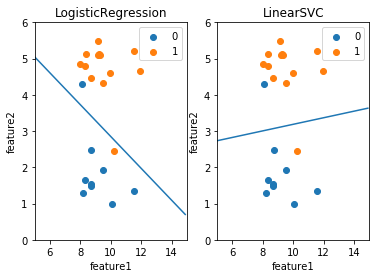

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y=mglearn.datasets.make_forge()

#各予測モデルのインスタンス生成し、func行列に格納
lr=LogisticRegression()
LSVC=LinearSVC()
func=[lr,LSVC]
name=["LogisticRegression","LinearSVC"]

#特徴量のデータを0/1で層別
c_zero=np.array([X[n] for n in range(X.shape[0]) if y[n]==0])
c_one=np.array([X[n] for n in range(X.shape[0]) if y[n]==1])

#プロット用インスタンスの生成
fig,axes=plt.subplots(1,2)

#生データと境界直線をプロット。coefはfeaure1とfeature2の２つの係数が得られることに注意。
#W1*x1+W2*x2+C=0が境界直線。移項してx2=...の形にしてplotに代入する。
for ax,model,name in zip(axes,func,name):
    clf=model.fit(X,y)
    coef=model.coef_
    intercept=model.intercept_[0]
    x_=np.arange(5,15,0.1)
    f_x=-(x_*coef[0,0]+intercept)/coef[0,1]
    
    #axes内の各axインスタンスに対して、グラフ描画のパラメータを設定
    ax.set_title(name)
    ax.set_xlabel("feature1")
    ax.set_xlim(5,15)
    ax.set_ylim(0,6)
    ax.set_ylabel("feature2")
    #生データ
    ax.scatter(c_zero[:,0],c_zero[:,1],label="0")
    ax.scatter(c_one[:,0],c_one[:,1],label="1")
    #境界直線
    ax.plot(x_,f_x)  
    ax.legend()
    
    

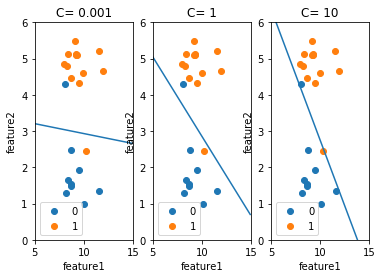

In [98]:
#Cのバリエーションをリストに格納
C_list=[0.001,1,10]

#特徴量のデータを0/1で層別
c_zero=np.array([X[n] for n in range(X.shape[0]) if y[n]==0])
c_one=np.array([X[n] for n in range(X.shape[0]) if y[n]==1])

fig2,axes2=plt.subplots(1,3)

for c,ax in zip(C_list,axes2):
    lr=LogisticRegression(C=c)
    clf=lr.fit(X,y)
    coef=lr.coef_
    intercept=lr.intercept_[0]
    x_=np.arange(5,15,0.1)
    f_x=-(x_*coef[0,0]+intercept)/coef[0,1]

    #axes内の各axインスタンスに対して、グラフ描画のパラメータを設定
    ax.set_title("C= "+str(c))
    ax.set_xlabel("feature1")
    ax.set_xlim(5,15)
    ax.set_ylim(0,6)
    ax.set_ylabel("feature2")
    #生データ
    ax.scatter(c_zero[:,0],c_zero[:,1],label="0")
    ax.scatter(c_one[:,0],c_one[:,1],label="1")
    #境界直線
    ax.plot(x_,f_x)  
    ax.legend()
    

lrのCパラメータ依存性の評価。小さいと汎化、大きいと過学習傾向